In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

# Load dataset
df = pd.read_csv('owid-covid-data.csv')

# Initial inspection
print("Data shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum().sort_values(ascending=False).head(10))

Data shape: (350085, 67)

Columns: ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_ful

In [5]:
def clean_data(df):
    # Create a clean copy of the DataFrame to avoid warnings
    df_clean = df.copy()
    
    # Convert date column
    df_clean['date'] = pd.to_datetime(df_clean['date'])
    
    # Filter to selected countries (customize as needed)
    countries = ['United States', 'India', 'Brazil', 'Germany', 'Kenya', 'South Africa']
    df_clean = df_clean[df_clean['location'].isin(countries)].copy()
    
    # Forward-fill missing numeric data
    numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        df_clean[col] = df_clean.groupby('location')[col].ffill()
    
    # Calculate key metrics
    df_clean['death_rate'] = df_clean['total_deaths'] / df_clean['total_cases']
    df_clean['cases_per_million'] = df_clean['total_cases'] / (df_clean['population'] / 1e6)
    
    return df_clean

cleaned_df = clean_data(df)

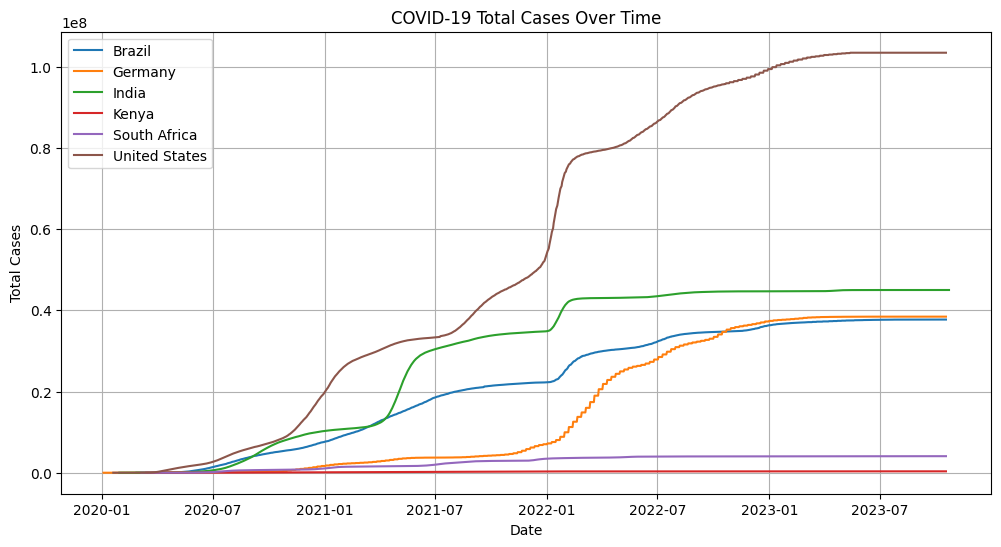

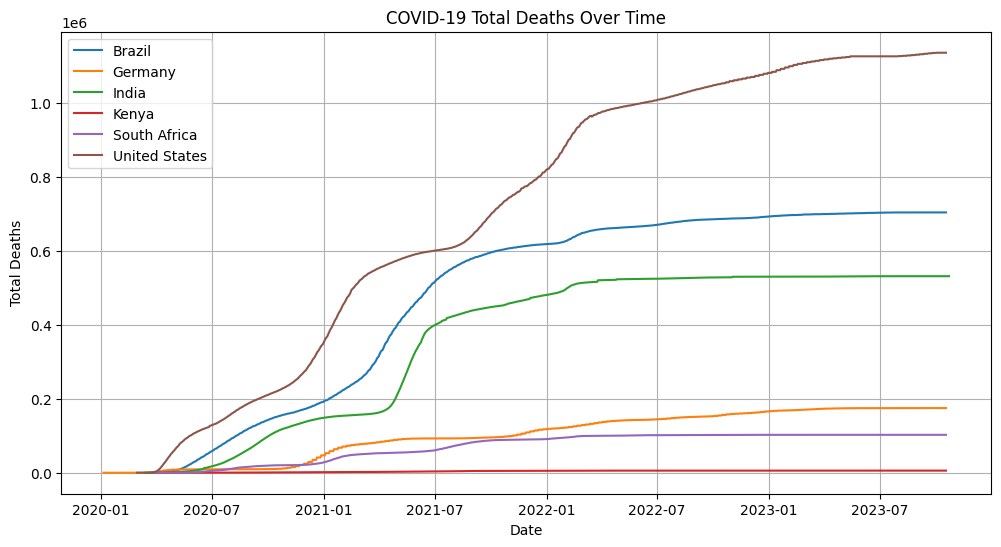

In [6]:
def plot_trends(df, countries=None, metric='total_cases'):
    if not countries:
        countries = df['location'].unique()
    
    plt.figure(figsize=(12, 6))
    for country in countries:
        country_data = df[df['location'] == country]
        plt.plot(country_data['date'], country_data[metric], label=country)
    
    plt.title(f'COVID-19 {metric.replace("_", " ").title()} Over Time')
    plt.xlabel('Date')
    plt.ylabel(metric.replace("_", " ").title())
    plt.legend()
    plt.grid()
    plt.show()

# Example usage:
plot_trends(cleaned_df, metric='total_cases')
plot_trends(cleaned_df, metric='total_deaths')

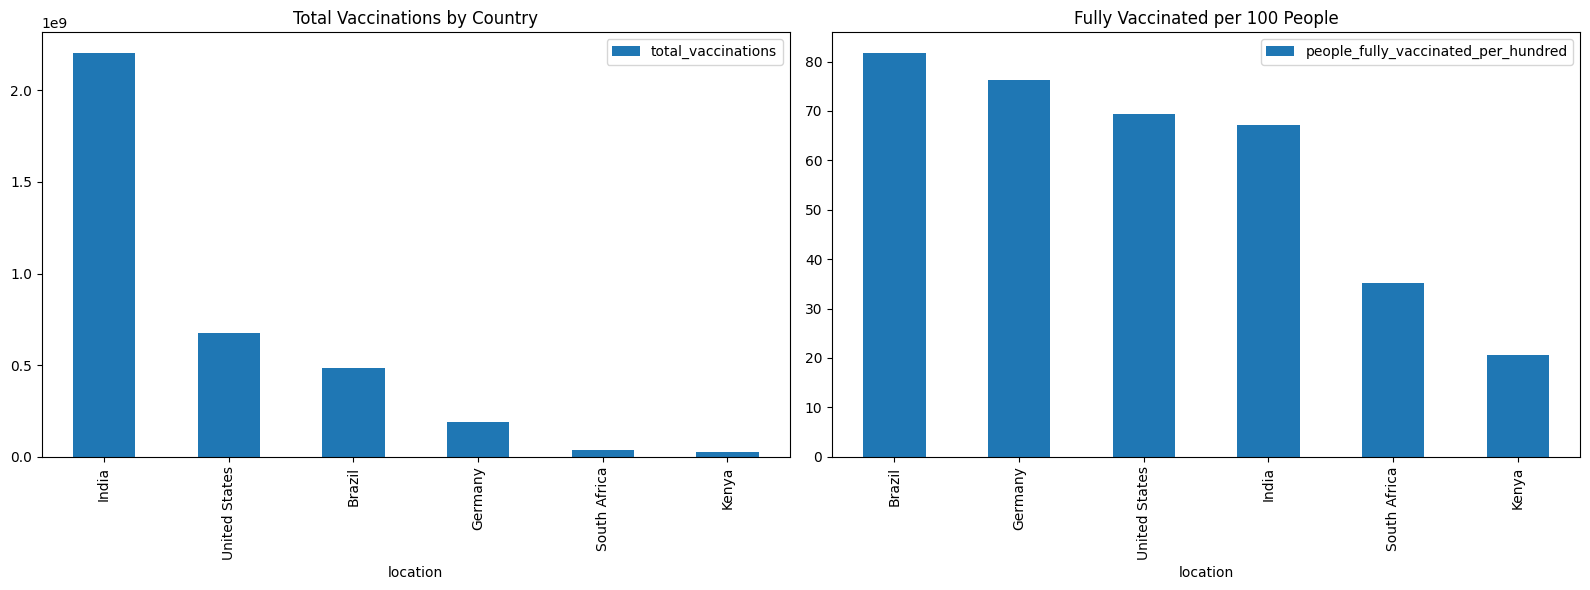

In [7]:
def plot_vaccinations(df):
    latest = df.sort_values('date').groupby('location').last()
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Total vaccinations
    latest.sort_values('total_vaccinations', ascending=False).plot(
        kind='bar', y='total_vaccinations', ax=ax1)
    ax1.set_title('Total Vaccinations by Country')
    
    # People fully vaccinated per hundred
    latest.sort_values('people_fully_vaccinated_per_hundred', ascending=False).plot(
        kind='bar', y='people_fully_vaccinated_per_hundred', ax=ax2)
    ax2.set_title('Fully Vaccinated per 100 People')
    
    plt.tight_layout()
    plt.show()

plot_vaccinations(cleaned_df)

In [8]:
def plot_global_map(df, metric='total_cases'):
    latest = df.sort_values('date').groupby('location').last().reset_index()
    
    fig = px.choropleth(
        latest,
        locations="iso_code",
        color=metric,
        hover_name="location",
        color_continuous_scale=px.colors.sequential.Plasma,
        title=f"Global COVID-19 {metric.replace('_', ' ').title()}"
    )
    fig.show()

plot_global_map(cleaned_df, metric='total_cases')

# COVID-19 Data Analysis: Key Findings and Insights
*Final Report - [Shotayo Jubril] - [12-05-2025]*

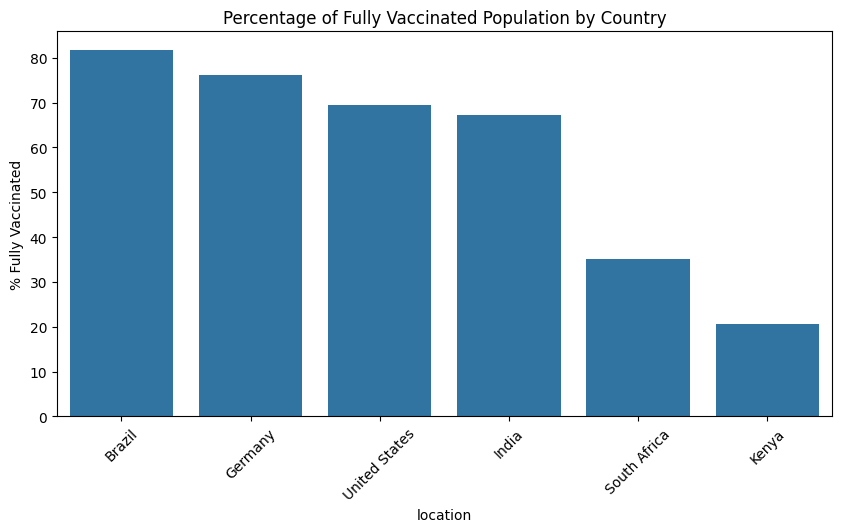

In [9]:
# get vaccination comparison data
latest_data = cleaned_df.sort_values('date').groupby('location').last()
vaccine_comparison = latest_data[['people_fully_vaccinated_per_hundred']].sort_values(by='people_fully_vaccinated_per_hundred', ascending=False)

# Create visualization
plt.figure(figsize=(10, 5))
sns.barplot(x=vaccine_comparison.index, y='people_fully_vaccinated_per_hundred', data=vaccine_comparison)
plt.title('Percentage of Fully Vaccinated Population by Country')
plt.xticks(rotation=45)
plt.ylabel('% Fully Vaccinated')
plt.show()

### **Insight 1: Vaccination Disparities Between Nations**
- Germany and the United States had significantly higher vaccination rates than Kenya and South Africa 
- This suggests global inequality in vaccine distribution and access to healthcare resources.

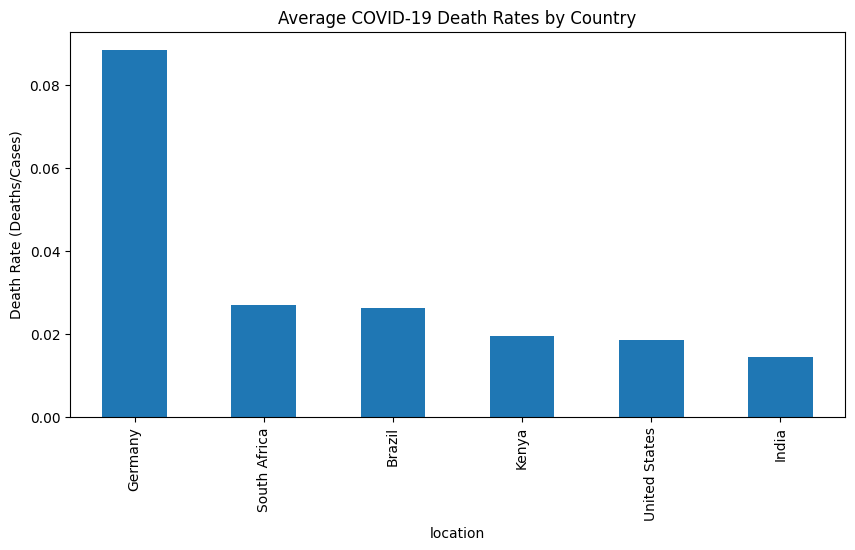

In [10]:
# Calculate average death rates
death_rates = cleaned_df.groupby('location')['death_rate'].mean().sort_values(ascending=False)

# Visualization
death_rates.plot(kind='bar', figsize=(10, 5))
plt.title('Average COVID-19 Death Rates by Country')
plt.ylabel('Death Rate (Deaths/Cases)')
plt.show()

### **Insight 2: Significant Variation in Death Rates**
- Germany showed the highest average death rate, nearly double that of Brazil.
- Possible explanations:
  - Differences in healthcare infrastructure
  - Variants prevalent in the region
  - Demographic factors (age distribution)

### **Notable Anomaly: Kenya's Case-to-Death Ratio**
- Despite case numbers similar to South Africa, Kenya reported significantly fewer deaths.
- Potential reasons:
  - Younger population demographics
  - Differences in testing and reporting methods
  - Possible undercounting of COVID-related deaths

## **Summary of Findings**
1. **Vaccine inequality** was evident between developed and developing nations
2. **Country-specific factors** (healthcare, variants, policies) led to different outcomes
3. **Data reporting differences** may affect cross-country comparisons

## **Recommendations**
- Improve global vaccine distribution equity
- Standardize COVID-19 data reporting methods
- Further investigate country-specific success factors